**EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering**

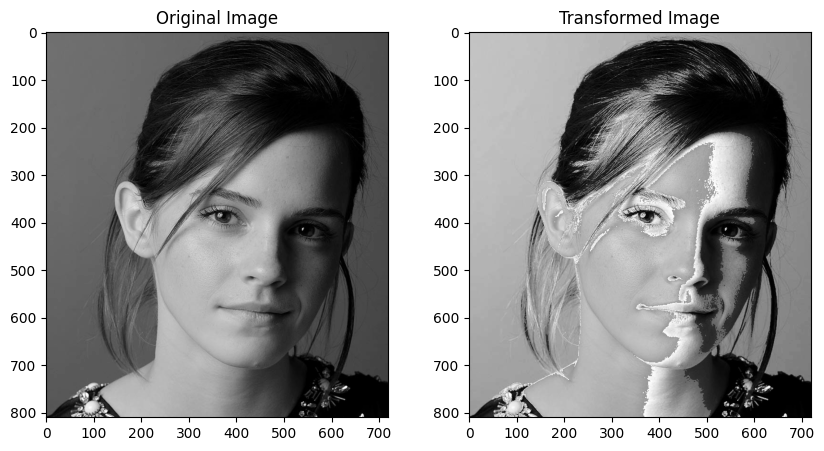

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply intensity transformation to a single pixel
def transform_pixel_intensity(pixel_val: int) -> float:
    if 50 <= pixel_val <= 150:
        return 1.55*pixel_val + 22.5
    else:
        return pixel_val

# Function to apply intensity transformation to the entire image
def apply_intensity_transformation(image: np.ndarray) -> np.ndarray:
    transformed_img = np.zeros(image.shape, dtype=np.uint8)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_intensity = image[row][col]
            transformed_img[row][col] = transform_pixel_intensity(pixel_intensity)

    return np.array(transformed_img, dtype=np.uint8)


# Load grayscale image
input_image = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation to the image
output_image = apply_intensity_transformation(input_image)


# Display both the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(output_image, cmap='gray')

plt.show()


2. brain proton density image

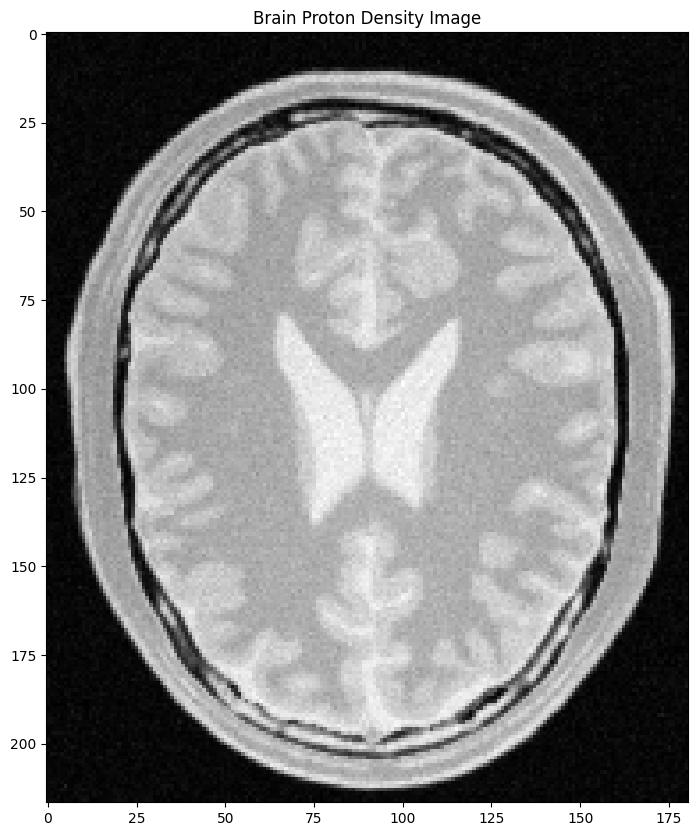

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the brain proton density image
brain_proton_density_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(brain_proton_density_img, cmap='gray')
plt.title("Brain Proton Density Image")
plt.show()

Image dtype: uint8
White Matter Intensities: [173, 160, 161, 177, 164]
Gray Matter Intensities : [197, 207, 199, 216, 219]
Mean White Matter Intensity: 167.0
Mean Gray Matter Intensity : 207.6


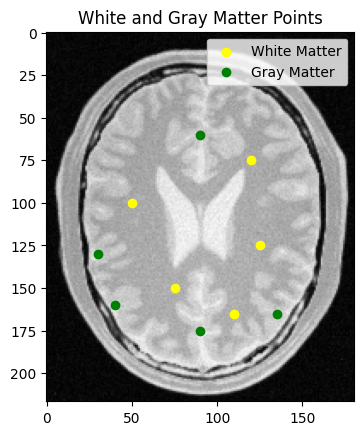

<Figure size 1000x10000 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the image is already loaded as 'brain_proton_density_img'

# Check the data type of the image
print(f"Image dtype: {brain_proton_density_img.dtype}")

# Define multiple points for white and gray matter (these are examples, adjust accordingly)
white_matter_points = [(50, 100), (75, 150), (125, 125), (110, 165), (120, 75)]
gray_matter_points = [(30, 130), (90, 175), (40, 160), (90, 60), (135, 165)]

# Extract pixel intensities for white and gray matter
white_matter_intensities = [brain_proton_density_img[point[1], point[0]] for point in white_matter_points]
gray_matter_intensities = [brain_proton_density_img[point[1], point[0]] for point in gray_matter_points]

# Calculate the mean intensity for each matter type
mean_white_matter_intensity = np.mean(white_matter_intensities)
mean_gray_matter_intensity = np.mean(gray_matter_intensities)

# Print the results
print(f"White Matter Intensities: {white_matter_intensities}")
print(f"Gray Matter Intensities : {gray_matter_intensities}")


print(f"Mean White Matter Intensity: {mean_white_matter_intensity}")
print(f"Mean Gray Matter Intensity : {mean_gray_matter_intensity}")

# Visualize the points on the image
plt.imshow(brain_proton_density_img, cmap='gray')

# Plot white matter points in red
for point in white_matter_points:
    plt.scatter(point[0], point[1], color='yellow', label='White Matter' if point == white_matter_points[0] else "")

# Plot gray matter points in blue
for point in gray_matter_points:
    plt.scatter(point[0], point[1], color='green', label='Gray Matter' if point == gray_matter_points[0] else "")

plt.legend()
plt.title("White and Gray Matter Points")
plt.figure(figsize=(10,100))
plt.show()


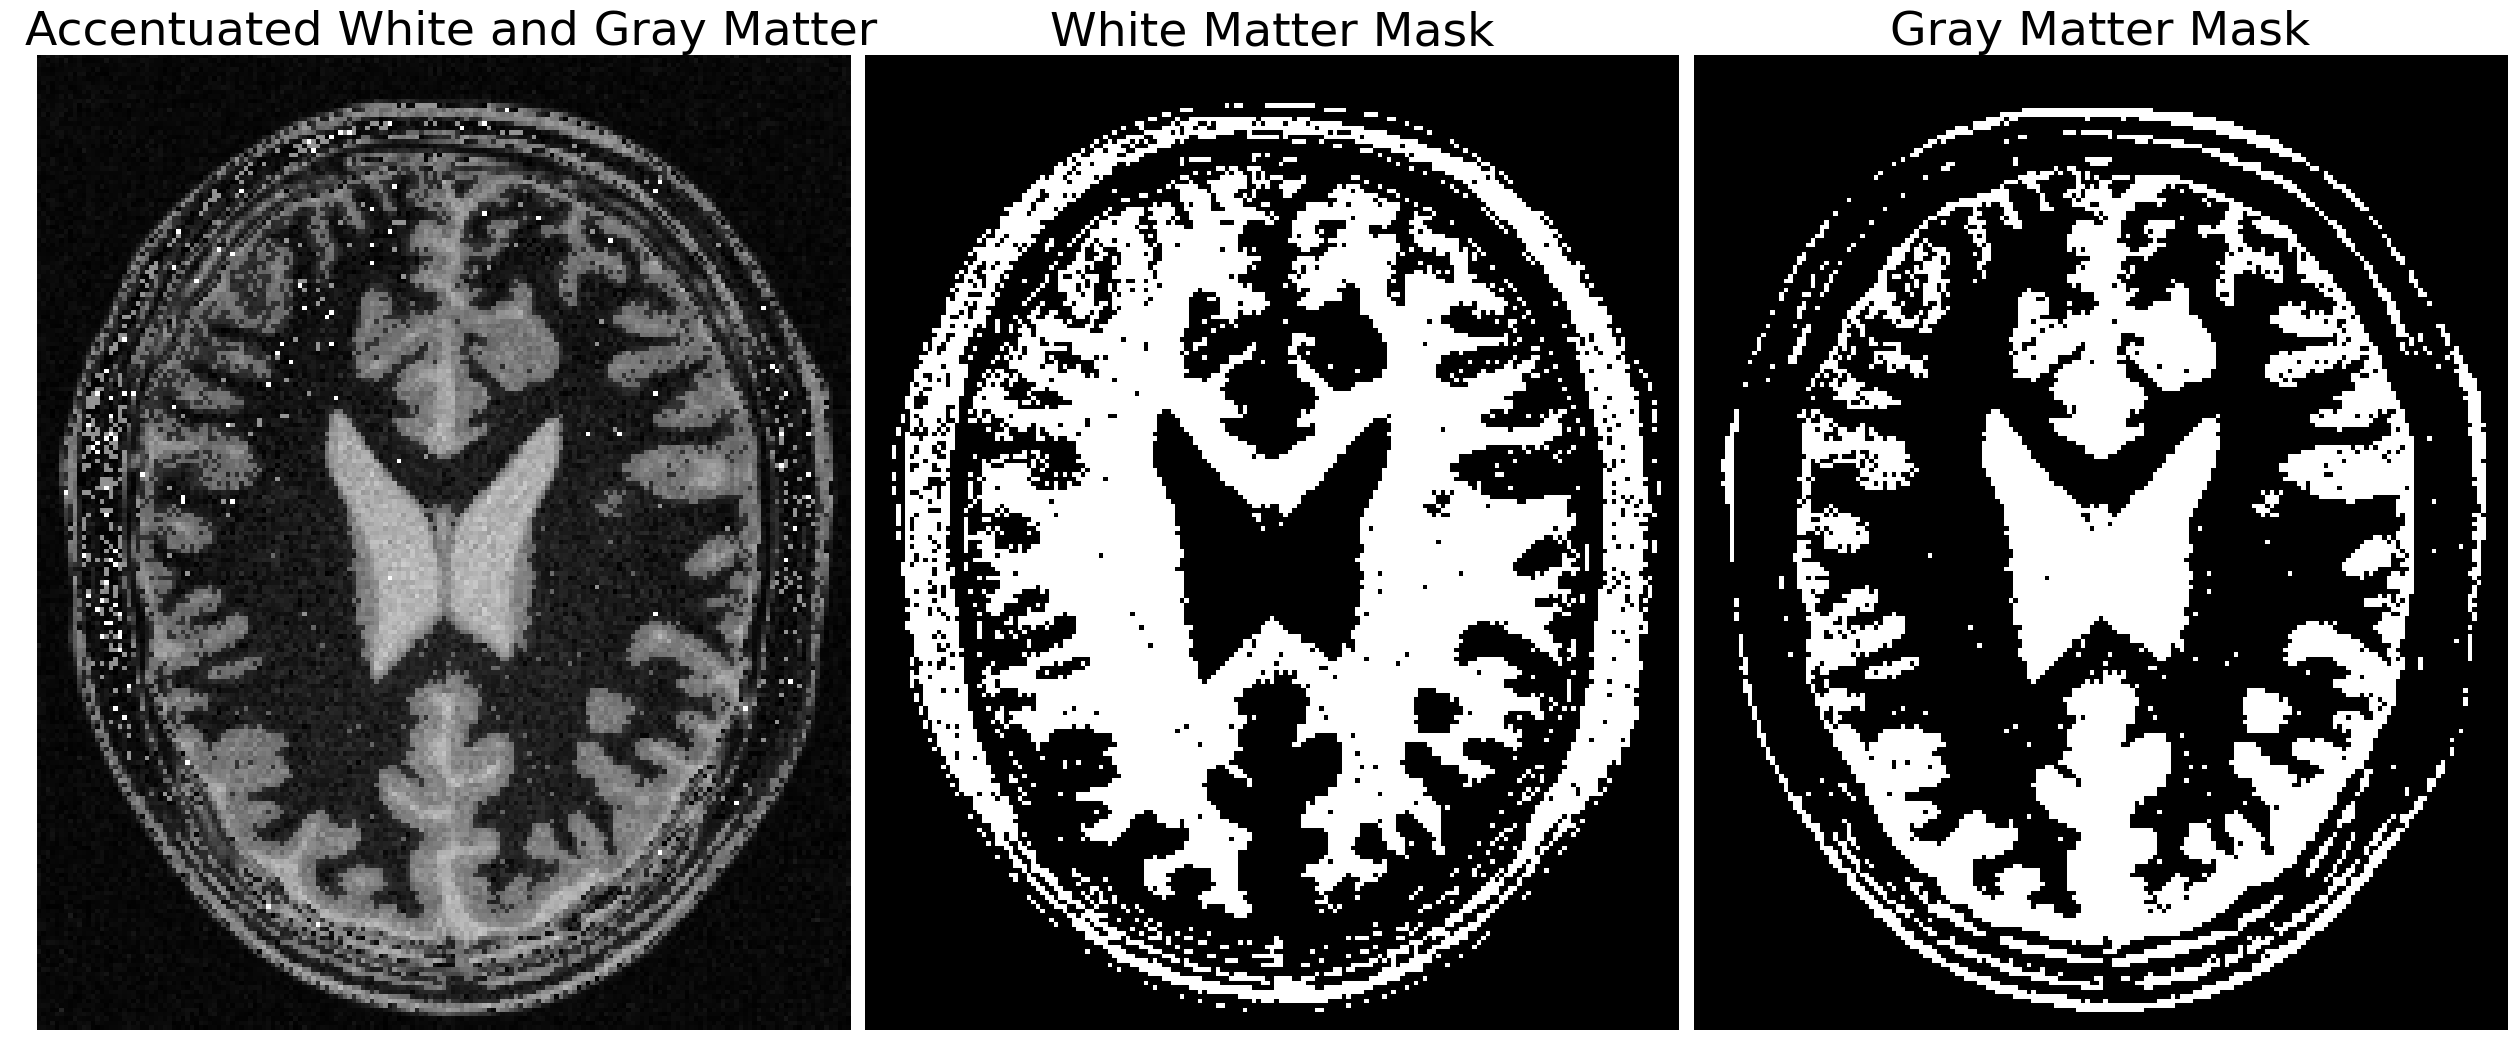

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Function to transform pixel intensities for white and gray matter
def accentuate_matter(image):
    # Create a copy of the image to apply transformations
    transformed_image = np.copy(image)
    
    # Apply transformation for white matter (150 <= pixel <= 250) # gray matter is brigher than white 
    gray_matter_mask = (image >= 186) & (image <= 250)
    transformed_image[gray_matter_mask] = 1.75 * image[gray_matter_mask] + 30
    
    # Apply transformation for gray matter (50 <= pixel <= 150) # white matter is darker than gray
    white_matter_mask = (image >= 150) & (image <= 185)
    transformed_image[white_matter_mask] = 1.55 * image[white_matter_mask] + 22.5
    
    
    return transformed_image, white_matter_mask, gray_matter_mask

# Apply the transformation to the brain image
transformed_brain_img, white_matter_mask, gray_matter_mask = accentuate_matter(brain_proton_density_img)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(25, 15))  # Adjust figsize as needed

# Display the transformed brain image
axes[0].imshow(transformed_brain_img, cmap='gray')
axes[0].set_title(" Accentuated White and Gray Matter", fontsize=34)
axes[0].axis('off')  # Hide axes

# Display the white matter mask
axes[1].imshow(white_matter_mask, cmap='gray')
axes[1].set_title("White Matter Mask", fontsize=34)
axes[1].axis('off')  # Hide axes

# Display the gray matter mask
axes[2].imshow(gray_matter_mask, cmap='gray')
axes[2].set_title("Gray Matter Mask", fontsize=34)
axes[2].axis('off')  # Hide axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

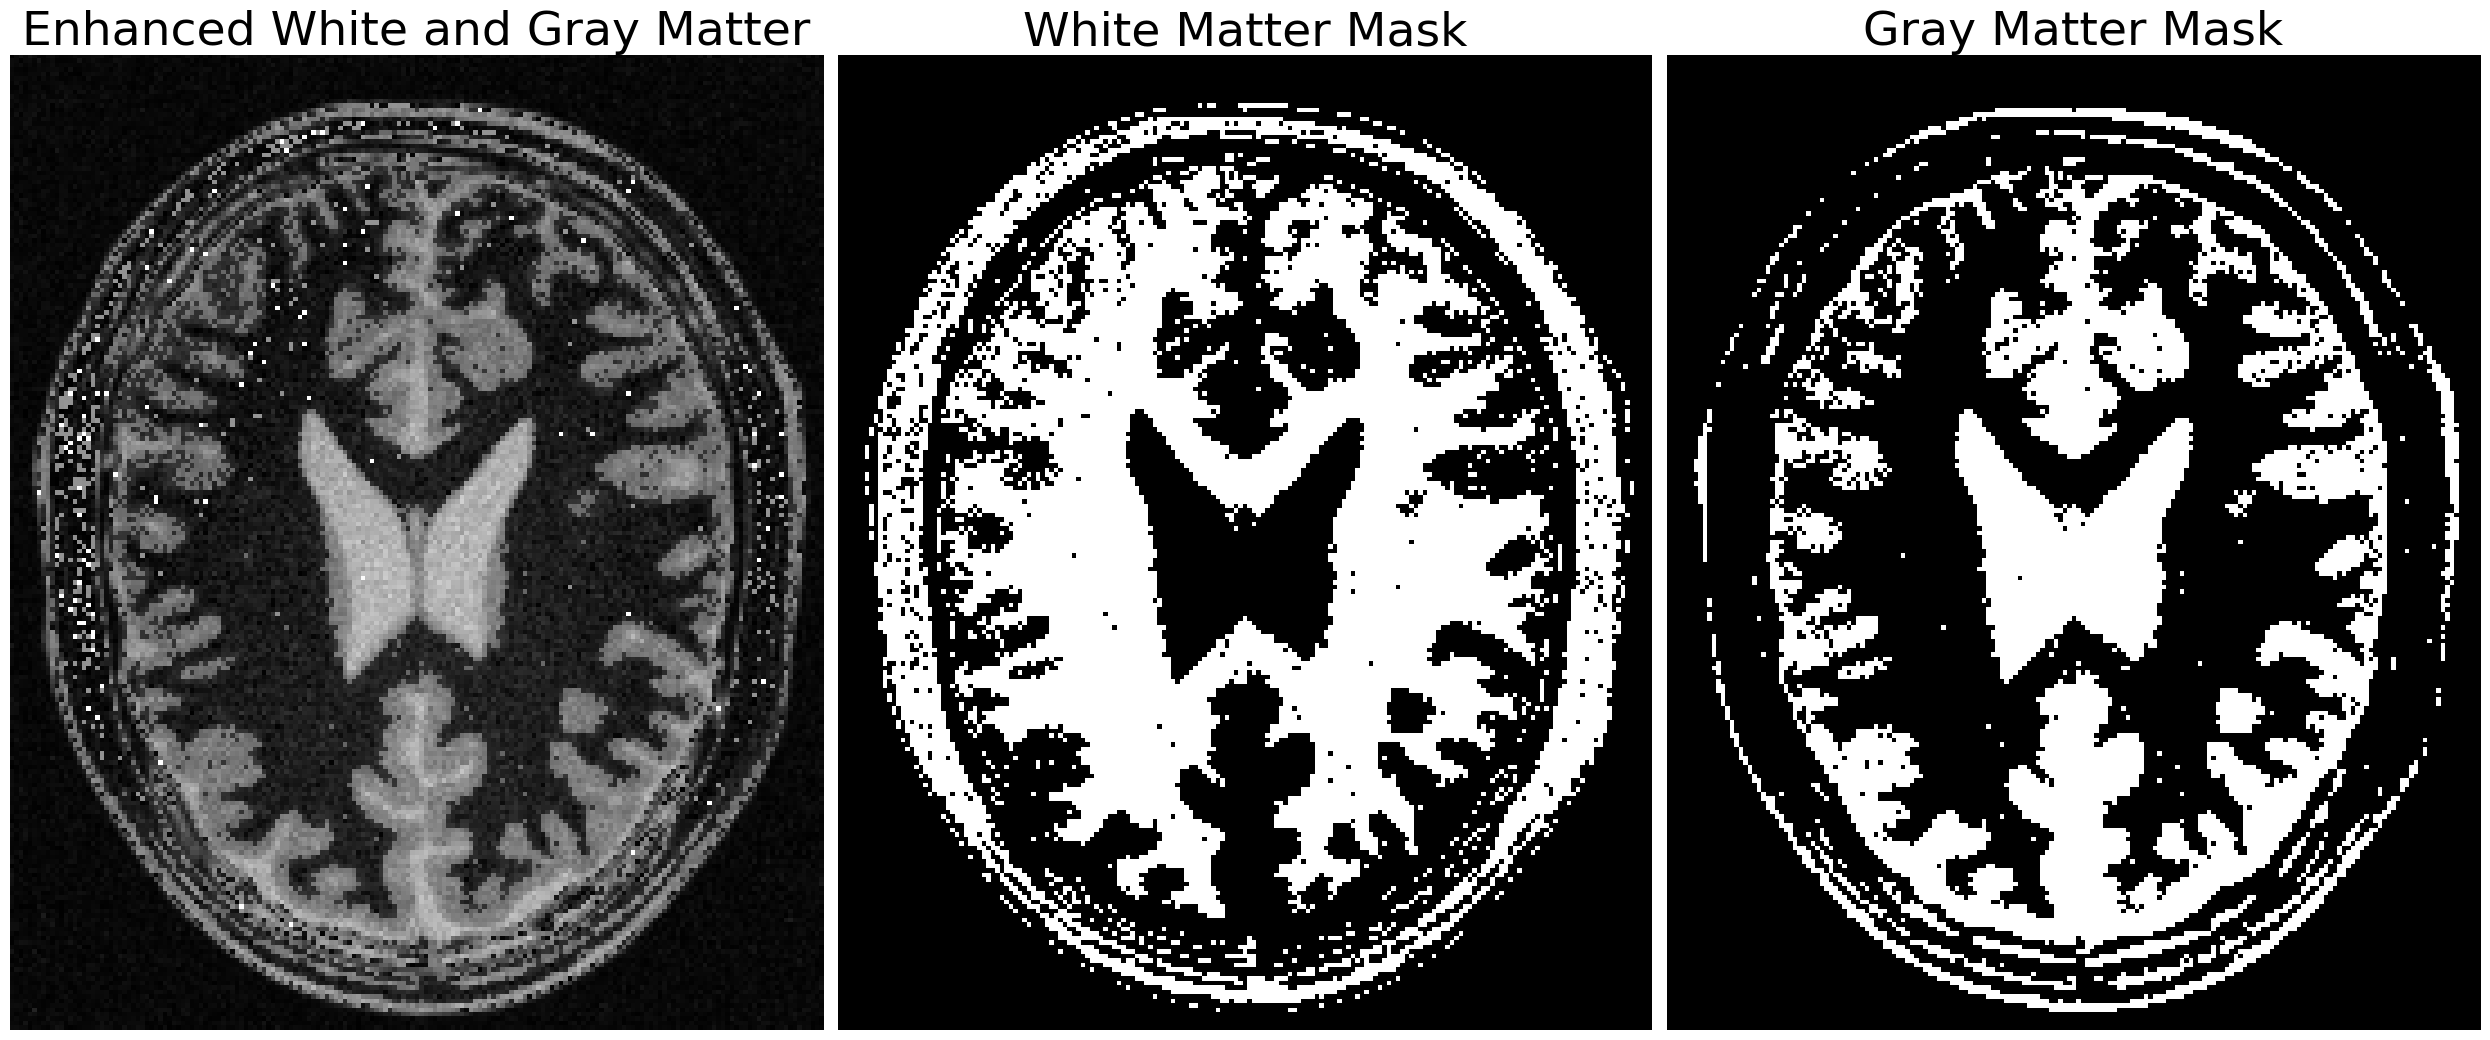

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Function to enhance pixel intensities for white and gray matter
# The intensity mean values of gray and white matter are 207 and 167, respectively.
def enhance_matter_intensity(input_image):
    # Create a copy of the image to apply transformations
    enhanced_image = np.copy(input_image)
    
    # Apply transformation for gray matter (187 <= pixel <= 255)
    gray_mask = (input_image >= 187) & (input_image <= 250)
    enhanced_image[gray_mask] = 1.75 * input_image[gray_mask] + 30
    
    # Apply transformation for white matter (140 <= pixel <= 186)
    white_mask = (input_image >= 150) & (input_image <= 186)
    enhanced_image[white_mask] = 1.55 * input_image[white_mask] + 22.5
    
    return enhanced_image, white_mask, gray_mask

# Apply the enhancement to the brain image
output_brain_image, white_mask, gray_mask = enhance_matter_intensity(brain_proton_density_img)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(25, 15))  # Adjust figsize as needed

# Display the enhanced brain image
axes[0].imshow(output_brain_image, cmap='gray')
axes[0].set_title("Enhanced White and Gray Matter", fontsize=34)
axes[0].axis('off')  # Hide axes

# Display the white matter mask
axes[1].imshow(white_mask, cmap='gray')
axes[1].set_title("White Matter Mask", fontsize=34)
axes[1].axis('off')  # Hide axes

# Display the gray matter mask
axes[2].imshow(gray_mask, cmap='gray')
axes[2].set_title("Gray Matter Mask", fontsize=34)
axes[2].axis('off')  # Hide axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




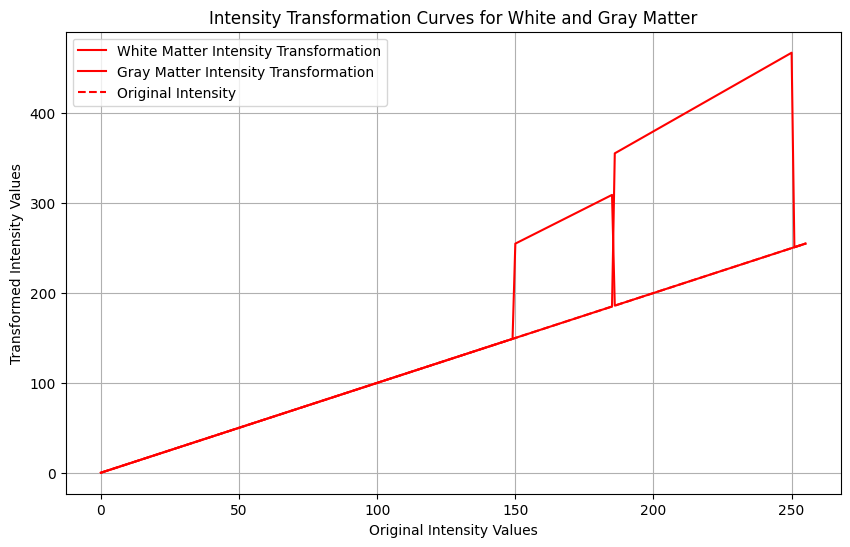

In [50]:
# Generate intensity values (0-255 range)
intensity_values = np.arange(0, 256)

# Apply intensity transformations for gray and white matter
gray_matter_intensity = np.array([1.75 * val + 30 if 186 <= val <= 250 else val for val in intensity_values])
white_matter_intensity = np.array([1.55 * val + 22.5 if 150 <= val <= 185 else val for val in intensity_values])

# Plot the intensity transformation curves
plt.figure(figsize=(10, 6))
plt.plot(intensity_values, white_matter_intensity, label='White Matter Intensity Transformation', color='red')
plt.plot(intensity_values, gray_matter_intensity, label='Gray Matter Intensity Transformation', color='red')
plt.plot(intensity_values, intensity_values, label='Original Intensity', linestyle='--', color='red') # Identity line
plt.title('Intensity Transformation Curves for White and Gray Matter')
plt.xlabel('Original Intensity Values')
plt.ylabel('Transformed Intensity Values')
plt.legend()
plt.grid(True)
plt.show()


*Q3*